In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from beakerx import *

### Face Detector using Haar Cascade Classifier

In [2]:
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')

735 329 32 32


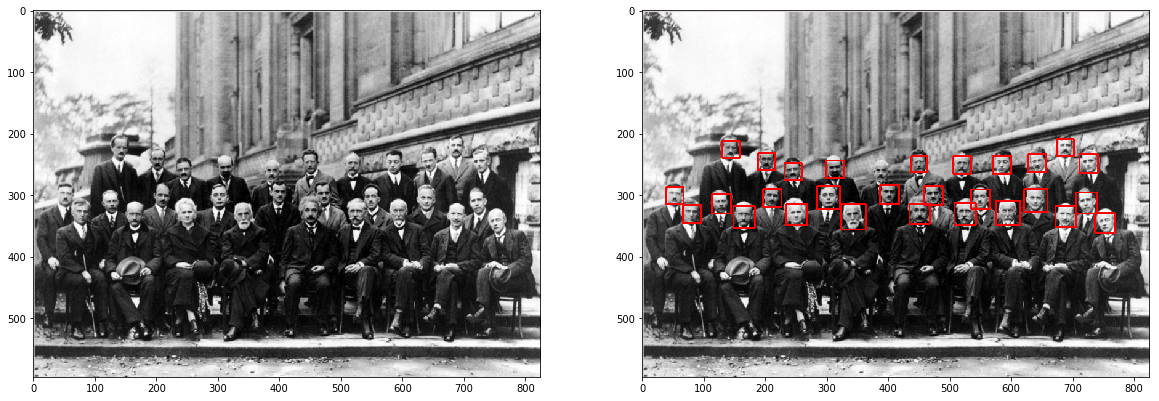

In [3]:
img = cv2.imread('images/scientists.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
f, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.imshow(img_gray, cmap='gray')

faces = face_cascade.detectMultiScale(img_gray, 1.06, 5)
for x,y,w,h in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    
ax2.imshow(img, cmap='gray')
print(x,y,w,h)

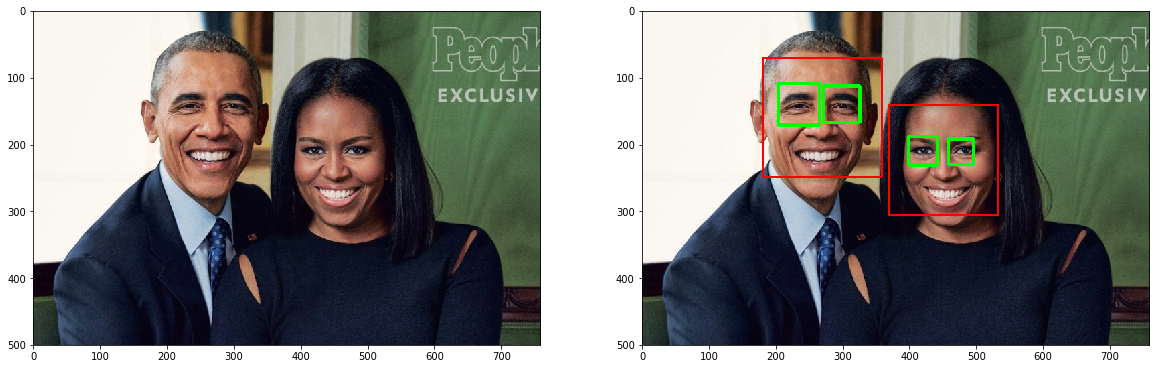

In [11]:
img = cv2.imread('images/obamas4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_orig = np.copy(img)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
f, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.imshow(img, cmap='gray')

faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)
for x,y,w,h in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    face_gray = img_gray[y:y+h, x:x+w]
    face_orig = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(face_gray)
    for ex,ey,ew,eh in eyes:
        cv2.rectangle(face_orig, (ex,ey), (ex+ew, ey+eh), (0,255,0), 4)
#plt.imshow(face_orig)
#plt.imshow(face_gray)
ax2.imshow(img)

Number of faces detected: 2


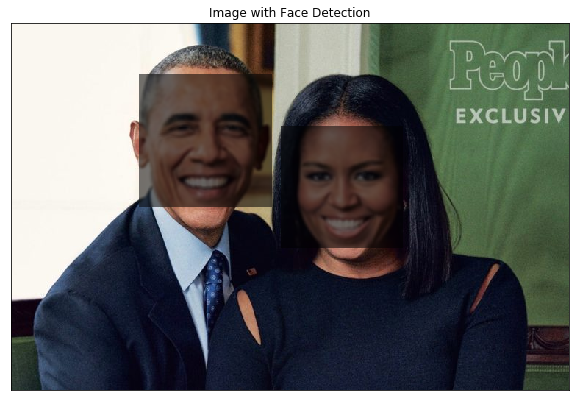

In [13]:
## TODO: Implement face detection
image = cv2.imread('images/obamas4.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.17, 6)

print('Number of faces detected:', len(faces))

image_with_detections = np.copy(image)
image_copy = np.copy(image)
kernel = np.ones((5,5),np.float32)/55
for (x,y,w,h) in faces:
    face_blur_rgb = image_with_detections[y:y+h, x:x+w]
    image_blur = cv2.filter2D(face_blur_rgb,-1,kernel)
    image_copy[y:y+h, x:x+w] = image_blur

    
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detection')
ax1.imshow(image_copy)

## TODO: Blur the bounding box around each detected face using an averaging filter and display the result

